<a href="https://colab.research.google.com/github/ctorney/moveGP/blob/master/figuresanddiagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os, sys
import numpy as np
from getpass import getpass
import pickle

import pandas as pd
np.set_printoptions(suppress=True,precision=3)
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
plt.style.use('seaborn-paper') 
plt.style.use('seaborn-whitegrid') 

data_dir = 'data/'
# code for running in Colab
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    if not os.path.exists("moveNSGP"):
        user = input('enter GitHub username: ')
        password = getpass('password: ')
        os.environ['git_user'] = user + ':' + password
        
        !git clone https://$git_user@github.com/ctorney/moveNSGP.git
    
    sys.path.append('moveNSGP')
    data_dir = 'moveNSGP/data/'
except Exception:
    pass

import tensorflow as tf
import tensorflow_probability as tfp


# Periodic movement process

In [45]:
df = pd.read_csv(data_dir + '/periodic.csv',index_col=0)
X = df[['Latitude','Longitude']].values
L = df['Lengthscale'].values
A = df['Noise'].values

secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values

T = (days*24*60+secs/60)/(60*24) 
T = T-T[0]
T=T[:,None]


z_len=720
z_skip=18
Z = T[:z_len:z_skip]
z_len=720

Zp = T[:z_len]

<ipython-input-45-663f817e6730>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
<ipython-input-45-663f817e6730>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values


In [46]:
X[:,0].var()

0.0662356416140862

In [47]:
n_samples = 2000
num_runs=4

samples = np.zeros((n_samples,num_runs,720))
all_amps = np.zeros(((n_samples)*num_runs,720,1))

for i in range(num_runs):
    amps = np.load(data_dir + '/amps_periodic_' + str(i) + '.npy')
    samples[:,i,:] = amps[...,0]
    
    
    
    all_amps[i*(n_samples):(i+1)*(n_samples),:] = (amps)


    

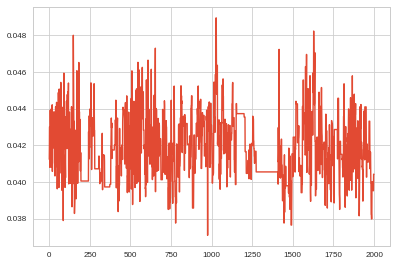

In [48]:
plt.plot(amps[:,0])

In [49]:
samples_ = tf.convert_to_tensor(samples[::])
rhat = tfp.mcmc.diagnostic.potential_scale_reduction(samples_, independent_chain_ndims=1)
rhat.numpy().max()

1.0772602378328942

In [50]:
samples_

<tf.Tensor: shape=(2000, 4, 720), dtype=float64, numpy=
array([[[0.044, 0.044, 0.044, ..., 0.044, 0.044, 0.044],
        [0.042, 0.042, 0.042, ..., 0.042, 0.042, 0.042],
        [0.041, 0.041, 0.041, ..., 0.041, 0.041, 0.041],
        [0.041, 0.041, 0.041, ..., 0.041, 0.041, 0.041]],

       [[0.045, 0.045, 0.045, ..., 0.045, 0.045, 0.045],
        [0.042, 0.042, 0.042, ..., 0.042, 0.042, 0.042],
        [0.045, 0.045, 0.045, ..., 0.045, 0.045, 0.045],
        [0.042, 0.042, 0.042, ..., 0.042, 0.042, 0.042]],

       [[0.041, 0.041, 0.041, ..., 0.041, 0.041, 0.041],
        [0.044, 0.044, 0.044, ..., 0.044, 0.044, 0.044],
        [0.044, 0.044, 0.044, ..., 0.044, 0.044, 0.044],
        [0.043, 0.043, 0.043, ..., 0.043, 0.043, 0.043]],

       ...,

       [[0.044, 0.044, 0.044, ..., 0.044, 0.044, 0.044],
        [0.041, 0.041, 0.041, ..., 0.041, 0.041, 0.041],
        [0.043, 0.043, 0.043, ..., 0.043, 0.043, 0.043],
        [0.04 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.04 ]],

       [[0.

In [51]:
tfp.mcmc.effective_sample_size(samples_[:,1])

<tf.Tensor: shape=(720,), dtype=float64, numpy=
array([ 94.128,  94.469,  94.818,  95.175,  95.541,  95.913,  96.298,
        96.694,  97.098,  97.516,  97.938,  98.367,  98.802,  99.239,
        99.674, 100.11 , 100.539, 100.949, 101.349, 101.728, 102.087,
       102.42 , 102.723, 102.991, 103.218, 103.403, 103.547, 103.647,
       103.7  , 103.708, 103.669, 103.587, 103.463, 103.298, 103.097,
       102.864, 102.603, 102.322, 102.026, 101.721, 101.41 , 101.103,
       100.805, 100.524, 100.267, 100.038,  99.846,  99.695,  99.589,
        99.532,  99.527,  99.577,  99.684,  99.85 , 100.077, 100.361,
       100.703, 101.097, 101.537, 102.02 , 102.551, 103.116, 103.7  ,
       104.311, 104.931, 105.557, 106.177, 106.765, 107.307, 107.816,
       108.279, 108.687, 109.033, 109.304, 109.494, 109.599, 109.615,
       109.54 , 109.373, 109.116, 108.773, 108.345, 107.845, 107.264,
       106.621, 105.855, 105.017, 104.146, 103.259, 102.37 , 101.481,
       100.598,  99.729,  98.898,  98.095,

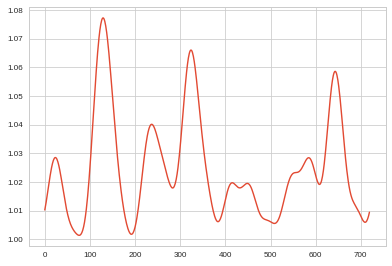

In [52]:
plt.plot(rhat)

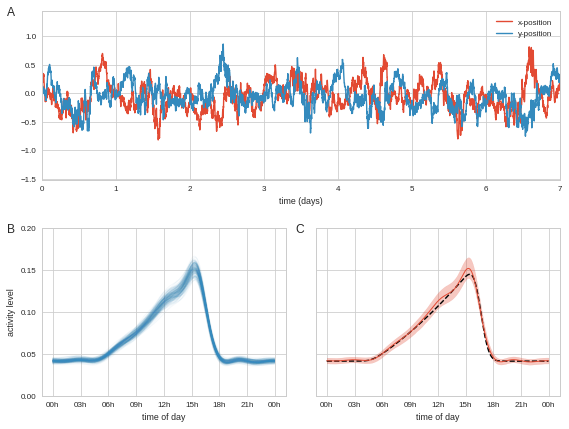

In [53]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%Hh')



gridsize = (2, 2)
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0))
ax3 = plt.subplot2grid(gridsize, (1, 1))

ax1.plot(T,X[:,0],label='x-position')
ax1.plot(T,X[:,1],label='y-position')
ax1.legend(loc='best')
ax1.set_xlabel('time (days)')
ax1.set_xlim(0,7)



Z_time=np.array([np.datetime64('2019') + np.timedelta64(int(k*24*60*60), 's') for k in Zp])


#plt.plot(T,A,'--',c='k')
for i in range(0,all_amps.shape[0],50):

    ax2.plot(Z_time,all_amps[i],c='C1', alpha=0.05,linewidth=1.0)

ax2.set_ylim(0,0.2)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax2.xaxis_date()

ax2.xaxis.set_major_formatter(myFmt)
#plt.gcf autofmt_xdate()
ax2.set_xlabel('time of day')
ax2.set_ylabel('activity level')


# #plt.plot(Z_time, A[:z_len:z_skip],'--',marker=11,c='k')
ax3.plot(Z_time[::1], A[:z_len:1],'--',c='k')

ax3.plot(Z_time, np.mean(all_amps, 0),c='C0', lw=1)

ax3.fill_between(Z_time[:],
                 np.percentile(all_amps, 2.5, axis=0)[:,0],
                 np.percentile(all_amps, 97.5, axis=0)[:,0],
                 color='C0', alpha = 0.3)

# #plt.xlim(0,1)
ax3.set_ylim(0,0.2)

# #plt.xlim(0,1)
# ax = plt.gca()
ax3.xaxis_date()
ax3.yaxis.set_major_locator(ticker.MultipleLocator(0.05))


ax3.xaxis.set_major_formatter(myFmt)
# #plt.gcf autofmt_xdate()
ax3.set_xlabel('time of day')
#ax3.set_ylabel('activity level')
ax3.set_yticklabels([])


plt.tight_layout(h_pad=2,w_pad=3)



xp = ax1.get_position().x0
yp = ax1.get_position().y1    
fig.text(xp - .06, yp- .01, 'A', size=12)

xp = ax2.get_position().x0
yp = ax2.get_position().y1    
fig.text(xp - .06, yp- .01, 'B', size=12)

xp = ax3.get_position().x0
yp = ax3.get_position().y1    
fig.text(xp - .035, yp- .01, 'C', size=12)

plt.savefig('figures/periodic_combined.png', dpi=300, bbox_inches = "tight")

# Migration shift

In [5]:

df = pd.read_csv(data_dir + '/shift.csv',index_col=0)
X = df[['Latitude','Longitude']].values
L = df['Lengthscale'].values
meanX = df['MeanX'].values
meanY = df['MeanY'].values


secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values

T = (days*24*60+secs/60)/(60*24) 
T = T-T[0]
T=T[:,None]



z_skip=1
Z = T[::z_skip]

<ipython-input-5-62e00d3e524f>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
<ipython-input-5-62e00d3e524f>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values


In [6]:
#means.shape

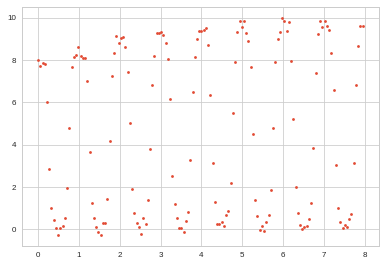

In [7]:
plt.plot(T[::20,0]/365,X[::20,1],'.')

In [41]:

n_samples = 200
samples = np.zeros((n_samples,730*2+3))

for i in range(1):
    
    means = np.load(data_dir + '/mean_shift_z_' + str(i) + '.npy')

    samples[:,0:730] = means[...,0]
    samples[:,730:730*2] = means[...,1]
    lengths = np.load(data_dir + '/length_shift_' + str(i) + '.npy')
    samples[:,730*2] = lengths[:,0]
    amps = np.load(data_dir + '/amp_shift_' + str(i) + '.npy')
    samples[:,730*2+1] = amps[:,0]
    obs = np.load(data_dir + '/obs_shift_' + str(i) + '.npy')
    samples[:,730*2+2] = obs[:,0]


In [42]:
ess = tfp.mcmc.effective_sample_size(samples)#, filter_beyond_positive_pairs=True)

In [43]:
ess

<tf.Tensor: shape=(1463,), dtype=float64, numpy=array([  7.584,  12.835,   4.962, ...,  12.34 ,  11.163, 147.42 ])>

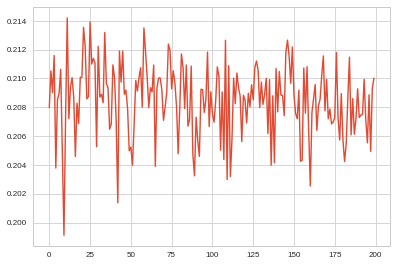

In [44]:
plt.plot(np.sqrt(obs))

In [45]:
zc = 730
num_runs=4

samples = np.zeros((n_samples,num_runs,730*2+3))
all_means = np.zeros(((n_samples)*num_runs,2920,2))
all_obs = np.zeros(((n_samples)*num_runs,1))

for i in range(num_runs):
    means = np.load(data_dir + '/mean_shift_z_' + str(i) + '.npy')

    samples[:,i,0:zc] = means[...,0]
    samples[:,i,zc:2*zc] = means[...,1]
    lengths = np.load(data_dir + '/length_shift_' + str(i) + '.npy')
    samples[:,i,2*zc] = lengths[:,0]
    amps = np.load(data_dir + '/amp_shift_' + str(i) + '.npy')
    samples[:,i,2*zc+1] = amps[:,0]
    obs = np.load(data_dir + '/obs_shift_' + str(i) + '.npy')
    samples[:,i,2*zc+2] = obs[:,0]
    
    t_means = np.load(data_dir + '/mean_shift_' + str(i) + '.npy')

    all_means[i*(n_samples):(i+1)*(n_samples),...] = t_means
    all_obs[i*(n_samples):(i+1)*(n_samples),0] = obs[:,0]

Text(0, 0.5, 'x-location')

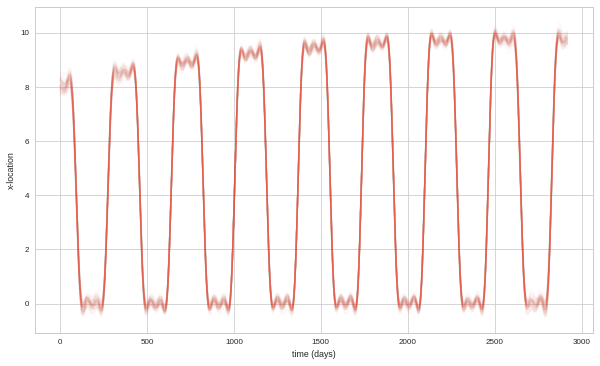

In [46]:
plt.figure(figsize=(10,6))

#plt.plot(T,meanX,'--',c='k')
#plt.plot(means[0,:,1],c='C0', alpha=1.0,linewidth=1.5,label='first')

for i in range(0,all_means.shape[0],10):

    plt.plot(all_means[i,:,1],c='C0', alpha=0.02,linewidth=1.5)

# for i in range(means.shape[0]-1000,means.shape[0]):

#     plt.plot(means[i,:,1],c='C1', alpha=0.02,linewidth=1.5)


#plt.legend()
#plt.xlim(0,1)
plt.xlabel('time (days)')
plt.ylabel('x-location')

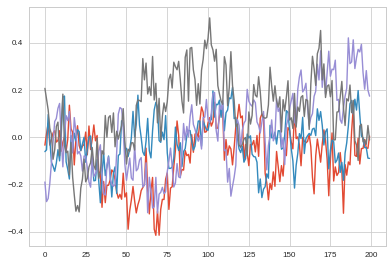

In [47]:
plt.plot(((samples[...,146])))

In [48]:
samples.shape

(200, 4, 1463)

In [49]:
samples_ = tf.convert_to_tensor(samples[:])
rhat = tfp.mcmc.diagnostic.potential_scale_reduction(samples_, independent_chain_ndims=1)
rhat.numpy().max()

2.955524239297782

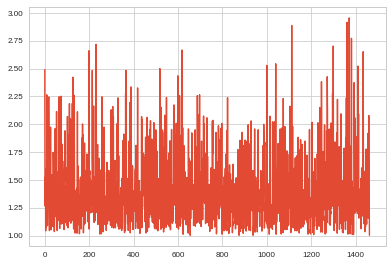

In [50]:
plt.plot(rhat[:])
#plt.ylim(0,2)

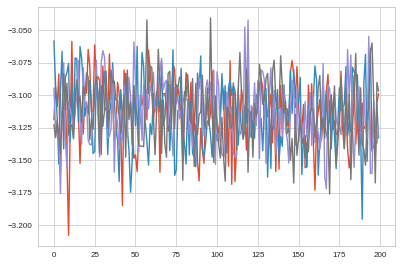

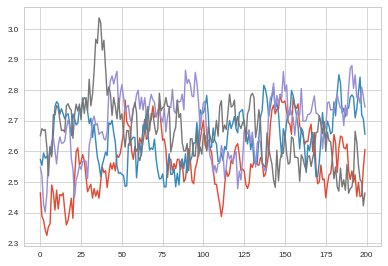

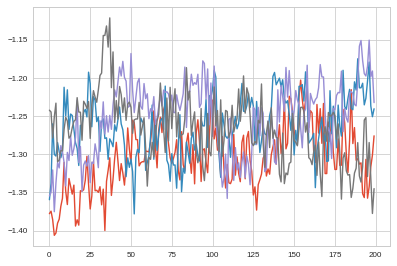

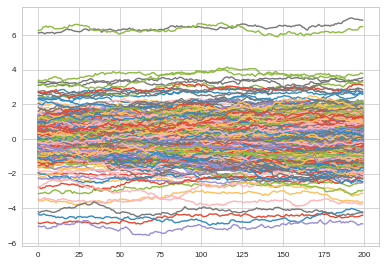

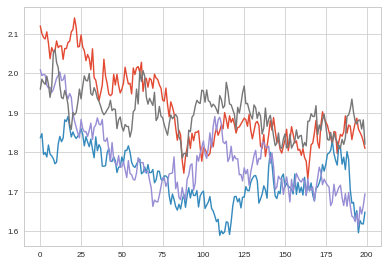

In [51]:
for i in range(5):
    
    
    arr = np.load(data_dir + '/all_shift_' + str(i) + '_0.npy')
    if i==3:
        plt.plot(arr[...,1])
    else:
        plt.plot(arr)

    
    arr = np.load(data_dir + '/all_shift_' + str(i) + '_1.npy')
    if i==3:
        plt.plot(arr[...,1])
    else:
        plt.plot(arr)
        
    arr = np.load(data_dir + '/all_shift_' + str(i) + '_2.npy')
    if i==3:
        plt.plot(arr[...,0])
    else:
        plt.plot(arr)

    
    arr = np.load(data_dir + '/all_shift_' + str(i) + '_3.npy')
    if i==3:
        plt.plot(arr[...,0])
    else:
        plt.plot(arr)
    plt.show()


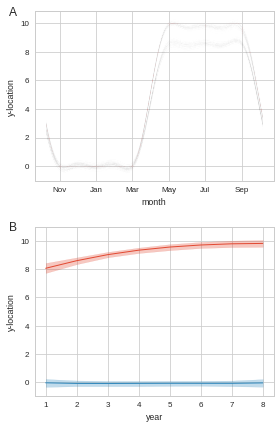

In [52]:

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%b')

gridsize = (2, 1)
fig = plt.figure(figsize=(4, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (1, 0))

s1 = 100//z_skip
s2 = 465//z_skip
Z_time=np.array([np.datetime64('2019') + np.timedelta64(int(k), 'D') for k in Z])
Z_time2=np.array([np.datetime64('2019') + np.timedelta64(int(k-365*6), 'D') for k in Z])


for i in range(0,all_means.shape[0],10):
    ax1.plot(Z_time[s1:s2]+180,all_means[i,s1:s2,1],c='C1', alpha=0.002,linewidth=0.5)

s1 = s1+365*6//z_skip
s2 = s2+365*6//z_skip    

for i in range(0,all_means.shape[0],10):
    ax1.plot(Z_time2[s1:s2]+180,all_means[i,s1:s2,1],c='C0', alpha=0.002,linewidth=0.5)


#plt.xlim(0,1)
ax1.set_xlabel('month')
ax1.set_ylabel('y-location')




ax1.xaxis.set_major_formatter(myFmt)


meanmean = np.zeros(8)
meanperc1=  np.zeros(8)
meanperc2=  np.zeros(8)

for i in range(8):
    ii = round(i*365)
    meanmean[i] = np.mean(all_means[:,ii,1])
    meanperc1[i] = np.percentile(all_means[:,ii,1], 2.5, axis=0)
    meanperc2[i] = np.percentile(all_means[:,ii,1], 97.5, axis=0)
    
ax2.plot(np.arange(1,9), meanmean,c='C0', lw=1)

ax2.fill_between(np.arange(1,9), meanperc1,
                 meanperc2,
                 color='C0', alpha = 0.3)


for i in range(8):
    ii = round((i+0.5)*365)
    meanmean[i] = np.mean(all_means[:,ii,1])
    meanperc1[i] = np.percentile(all_means[:,ii,1], 2.5, axis=0)
    meanperc2[i] = np.percentile(all_means[:,ii,1], 97.5, axis=0)
    
ax2.plot(np.arange(1,9), meanmean,c='C1', lw=1)

ax2.fill_between(np.arange(1,9), meanperc1,
                 meanperc2,
                 color='C1', alpha = 0.3)

ax2.set_ylim(-1,11)


ax2.set_xlabel('year')
ax2.set_ylabel('y-location')


plt.tight_layout(h_pad=2,w_pad=3)



xp = ax1.get_position().x0
yp = ax1.get_position().y1    
fig.text(xp - .09, yp- .01, 'A', size=12)

xp = ax2.get_position().x0
yp = ax2.get_position().y1    
fig.text(xp - .09, yp- .01, 'B', size=12)

plt.savefig('figures/shift_combined.png', dpi=300, bbox_inches = "tight")

In [66]:
#plt.plot(Z_time[s1:s2]+180,all_means[i,s1:s2,1],c='C1', alpha=0.002,linewidth=0.5)
all_means[:,s1:s2,:].shape
Z_time[s1:s2]

array([], dtype='datetime64[D]')

In [67]:
meanraws = np.load(data_dir + '/mean_shift_' + str(0) + '.npy')
meanraws2 = np.load(data_dir + '/mean_shift_' + str(1) + '.npy')
meanraws3 = np.load(data_dir + '/mean_shift_' + str(2) + '.npy')
meanraws4 = np.load(data_dir + '/mean_shift_' + str(3) + '.npy')

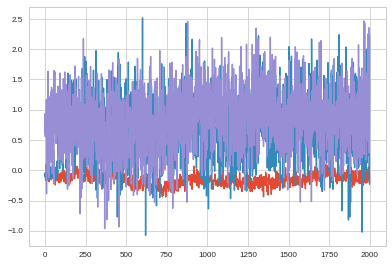

In [68]:
k =1326-730
plt.plot(meanraws[...,k,1])
#plt.show()
plt.plot(meanraws2[...,k,1])
#plt.plot(meanraws3[...,k,1])
plt.plot(meanraws4[...,k,1])
plt.show()

# Switching behaviours

<ipython-input-75-dc46519a82f0>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
<ipython-input-75-dc46519a82f0>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values


array([  0.  ,   0.25,   0.5 , ..., 364.5 , 364.75, 365.  ])

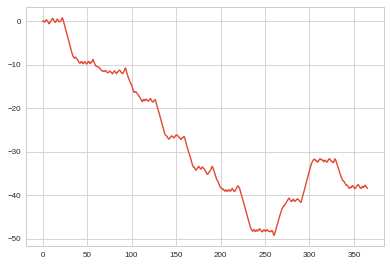

In [75]:
df = pd.read_csv(data_dir + '/switch.csv',index_col=0)
X = df[['Latitude','Longitude']].values
ID = df['Animal'].values


secs =(pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.seconds.astype(float).values
days = (pd.to_datetime(df['Date'])- pd.datetime(2000,1,1)).dt.days.astype(float).values

T = (days*24*60+secs/60)/(60*24) 
T = T-T[0]
T=T[:,None]


uT = np.unique(T)
z_skip=10
Z = uT[::z_skip,None]
vv = np.diff(X,axis=0)/np.diff(T,axis=0)
plt.plot(uT,X[ID==0,0])
uT

In [41]:
df = df[df.Animal==0]

In [76]:
n_samples = 20
num_runs=4

iss = [1,2,3]

samples = np.zeros((n_samples,num_runs,148))
all_lengths = np.zeros(((n_samples)*num_runs,147,1))
all_amps = np.zeros(((n_samples)*num_runs,1))
all_obs = np.zeros(((n_samples)*num_runs,1))


for i in range(num_runs):
    #j=iss[i]
    lengths = np.load(data_dir + '/length_switch_' + str(i) + '.npy')
    samples[:,i,:147] = lengths[...,0]
    amps = np.load(data_dir + '/amp_switch_' + str(i) + '.npy')
    samples[:,i,147] = amps
#     obs = np.load(data_dir + '/obs_switch_' + str(i) + '.npy')
#     samples[:,i,148] = obs
    
    all_lengths[i*(n_samples):(i+1)*(n_samples),...] = lengths
    all_amps[i*(n_samples):(i+1)*(n_samples),0] = amps

    #all_obs[i*(n_samples):(i+1)*(n_samples),0] = obs


    
    
    


In [77]:
i

3

In [78]:
samples_ = tf.convert_to_tensor(samples[::])
rhat = tfp.mcmc.diagnostic.potential_scale_reduction(samples_, independent_chain_ndims=1)
rhat.numpy().max()

10.575887301039394

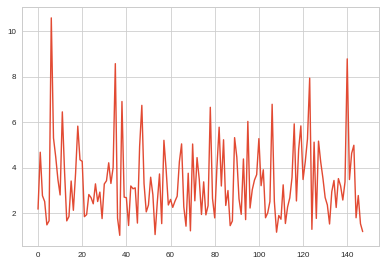

In [79]:
plt.plot(rhat)
#plt.ylim(0,5)

In [ ]:
plt.plot(all_amps)


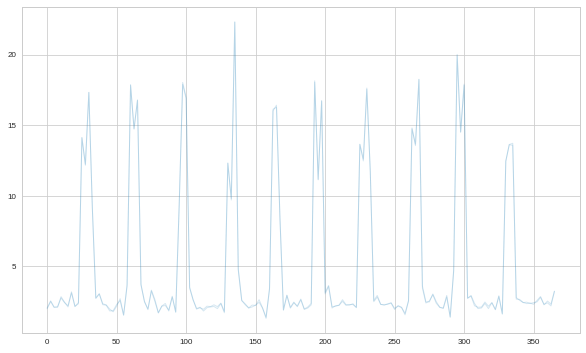

In [80]:
lengths = np.load(data_dir + '/length_switch_3.npy')


plt.figure(figsize=(10,6))

#plt.plot(T,meanX,'--',c='k')
for i in range(0,lengths.shape[0],10):

    plt.plot(Z,lengths[i,:],c='C1', alpha=0.2,linewidth=1)
    
plt.show()


In [ ]:
amp1s = np.load(data_dir + '/amp_switch_0.npy')
amp3s = np.load(data_dir + '/amp_switch_3.npy')
plt.plot(amp1s,label='good')
plt.plot(amp3s,label='bad')

plt.show()

In [ ]:
for i in range(5):
    arr = np.load(data_dir + '/all_switch_' + str(i) + '_0.npy')
    plt.plot(arr)
    
    arr = np.load(data_dir + '/all_switch_' + str(i) + '_3.npy')
    plt.plot(arr)
    
    plt.show()


In [ ]:
plt.figure(figsize=(10,6))

#plt.plot(T,meanX,'--',c='k')
for i in range(0,all_lengths.shape[0],10):

    plt.plot(Z,all_lengths[i,:],c='C1', alpha=0.02,linewidth=1)
    
plt.show()


Text(0.059392361111111125, 0.2303935185185183, 'C')

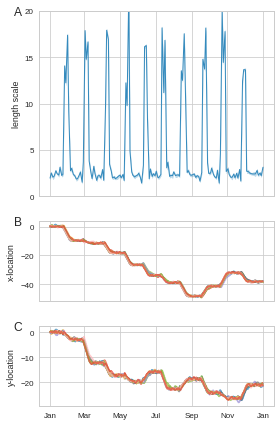

In [81]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

myFmt = mdates.DateFormatter('%b')

#lengths = np.load('data/ls_switch.npy')
#amps = np.load('data/amps_switch.npy')

Z_time=np.array([np.datetime64('2019') + np.timedelta64(int(k), 'D') for k in Z])
T_time=np.array([np.datetime64('2019') + np.timedelta64(int(k), 'D') for k in T])



gridsize = (4, 1)
#fig = plt.figure(figsize=(8, 12))
fig = plt.figure(figsize=(4, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (3, 0))

ax1.plot(Z_time, np.mean(all_lengths, 0),c='C1', lw=1)

ax1.fill_between(Z_time[:],
                 np.percentile(all_lengths, 2.5, axis=0)[:,0],
                 np.percentile(all_lengths, 97.5, axis=0)[:,0],
                 color='C1', alpha = 0.3)

# for i in range(0,lengths.shape[0]):
#     ax1.plot(Z,lengths[i,:],c='C1', alpha=0.002,linewidth=1.5)

ax1.set_ylabel('length scale')    
ax1.set_ylim(0,20) 
ax1.yaxis.set_ticks(np.arange(0, 21, 5))
for i in np.unique(ID):
    ax2.plot(T_time[i==ID],X[i==ID,0], alpha=0.7)
ax2.set_ylabel('x-location')    

for i in np.unique(ID):   
    ax3.plot(T_time[i==ID],X[i==ID,1],alpha=0.7)   
    
ax3.set_ylabel('y-location')

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.xaxis.set_major_formatter(myFmt)


plt.tight_layout(h_pad=2,w_pad=3)
xp = ax1.get_position().x0
yp = ax1.get_position().y1    
fig.text(xp - .09, yp- .01, 'A', size=12)

xp = ax2.get_position().x0
yp = ax2.get_position().y1    
fig.text(xp - .09, yp- .01, 'B', size=12)

xp = ax3.get_position().x0
yp = ax3.get_position().y1    
fig.text(xp - .09, yp- .01, 'C', size=12)
#plt.savefig('figures/switch_lengthscale.png', dpi=300, bbox_inches = "tight")